In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### EDA on Customers Dataset

In [2]:
data = pd.read_csv(r"Downloads/Customers.csv")

In [13]:
# Data Overview

print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
CustomerID      200
CustomerName    200
Region            4
SignupDate      179
dtype: int64


In [5]:
# Handling Missing Values
data.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [8]:
print(data.shape)
print(data.dtypes)

(200, 4)
CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object


In [14]:
data.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [15]:
# Unique values per column
print("Unique Values in Each Column:")
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")

Unique Values in Each Column:
CustomerID: 200 unique values
CustomerName: 200 unique values
Region: 4 unique values
SignupDate: 179 unique values


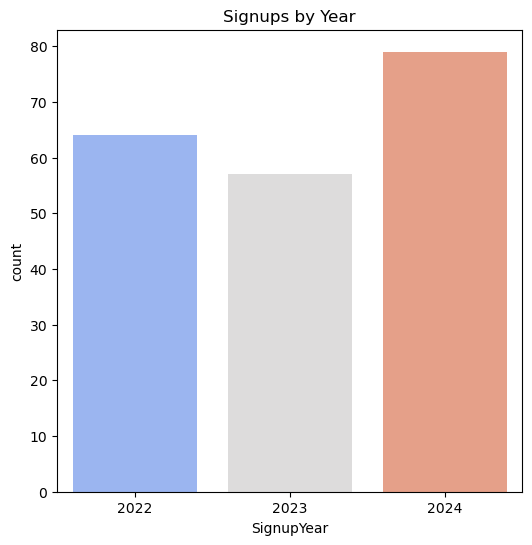

In [21]:
# Analyze Signup Date
data['SignupDate'] = pd.to_datetime(data['SignupDate'])
data['SignupYear'] = data['SignupDate'].dt.year
# Plot by signup data
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='SignupYear', palette='coolwarm', order=sorted(data['SignupYear'].unique()))
plt.title('Signups by Year')
plt.show()


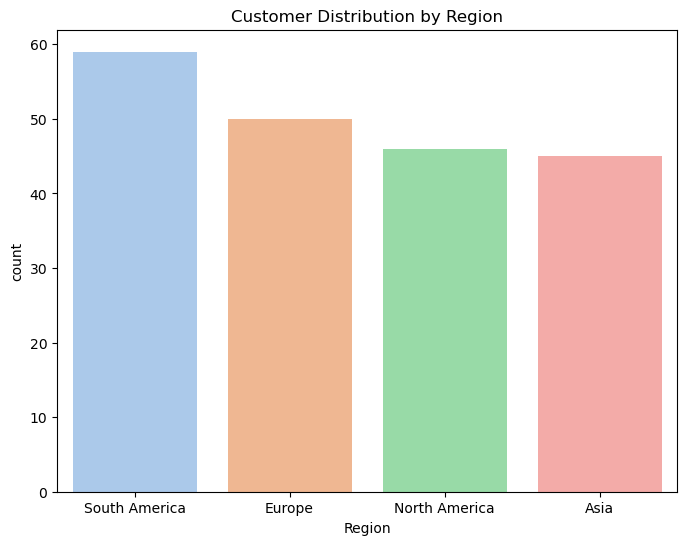

In [23]:
# Analyze Region Distribution
if 'Region' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x='Region', palette='pastel', order=data['Region'].value_counts().index)
    plt.title('Customer Distribution by Region')
    plt.show()

### EDA on Transaction Dataset

In [25]:
df = pd.read_csv(r"Downloads/Transactions.csv")

In [28]:
# Datatype od dataset
df.dtypes

TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object

In [29]:
# Description of dataset
df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [31]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [32]:
# Shape of dataset
df.shape

(1000, 7)

In [33]:
# Missing values in dataset
df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [35]:
# Unique values per column
print("Unique Values in Each Column:")
for col in data.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Unique Values in Each Column:
TransactionID: 1000 unique values
CustomerID: 199 unique values
ProductID: 100 unique values
TransactionDate: 1000 unique values
Quantity: 4 unique values
TotalValue: 369 unique values
Price: 100 unique values


In [39]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


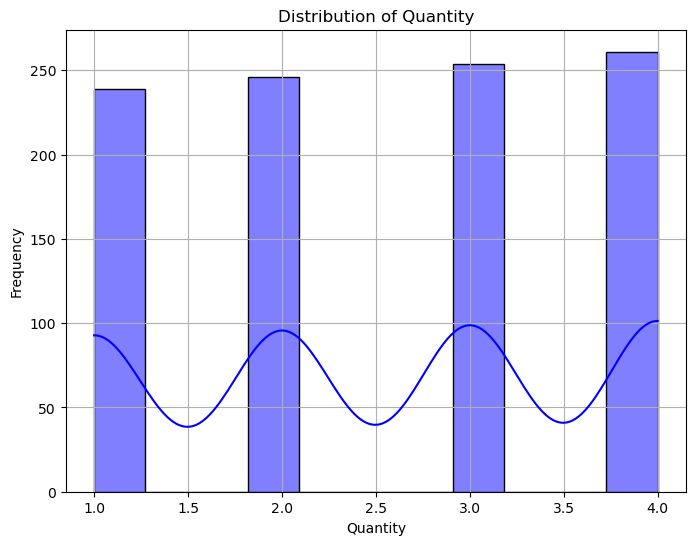

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


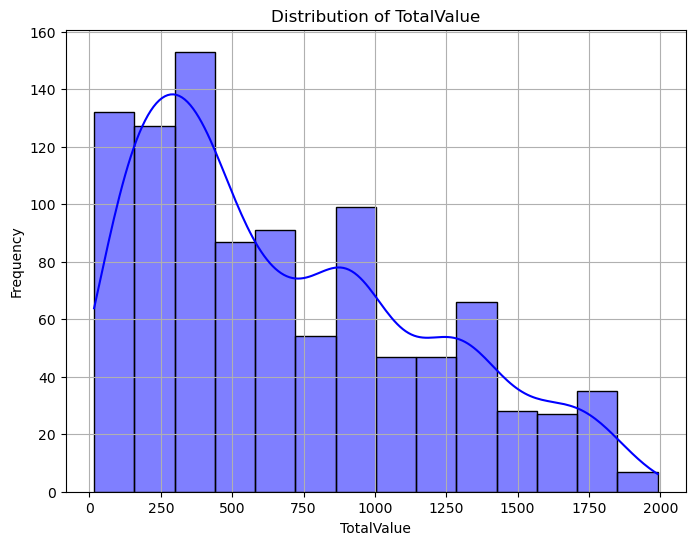

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


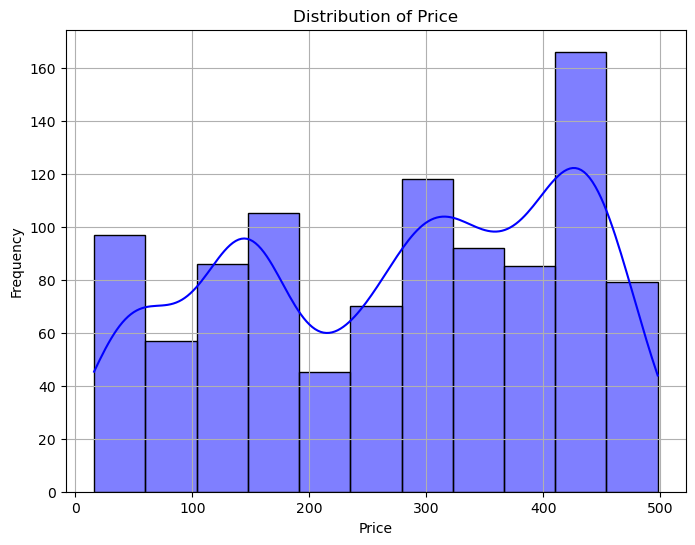

In [44]:
# Distribution of Numerical Features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

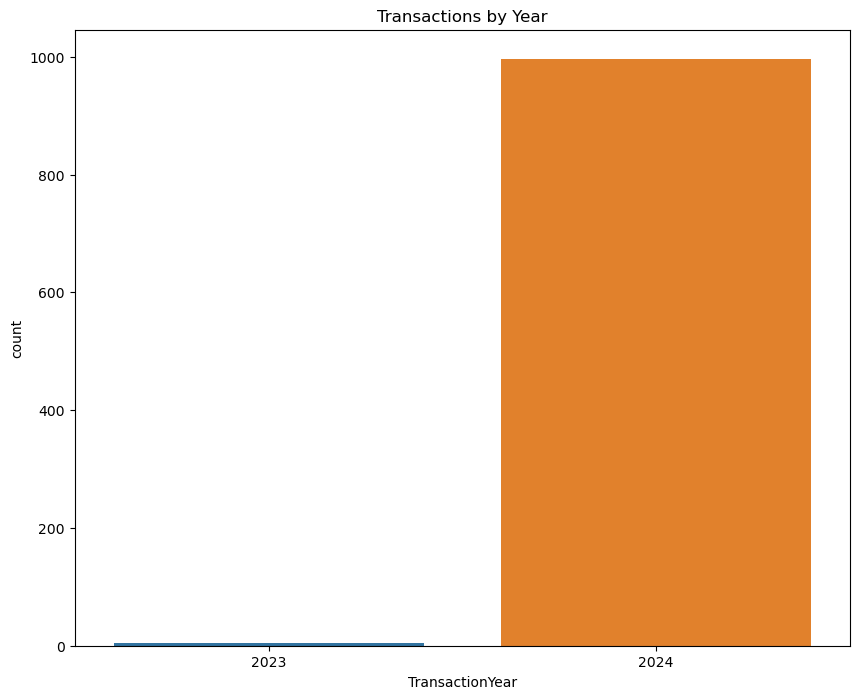

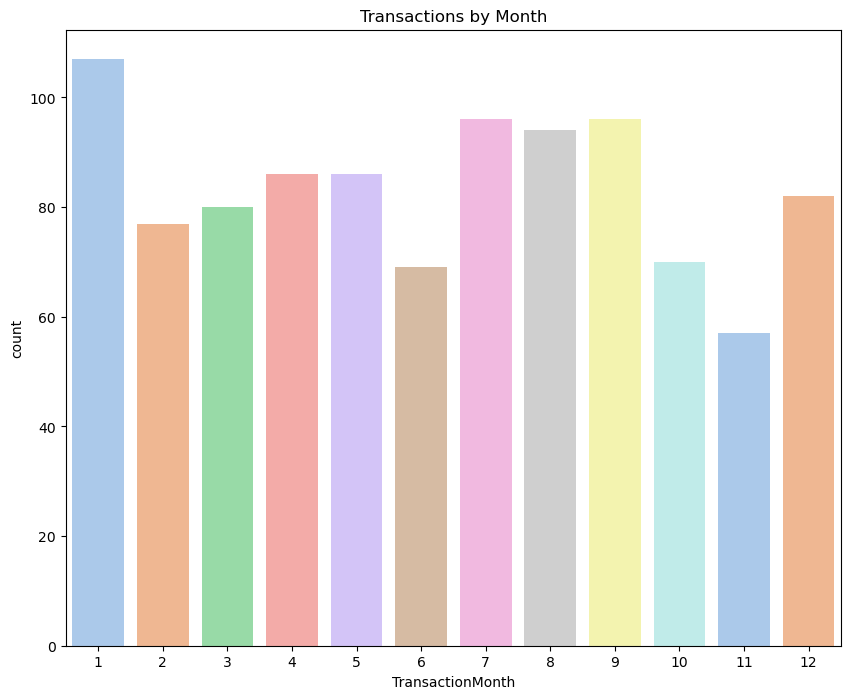

In [43]:
# Analyze Transaction Dates
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionYear'] = df['TransactionDate'].dt.year

plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='TransactionYear', order=sorted(df['TransactionYear'].unique()))
plt.title('Transactions by Year')
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='TransactionMonth', palette='pastel')
plt.title('Transactions by Month')
plt.show()

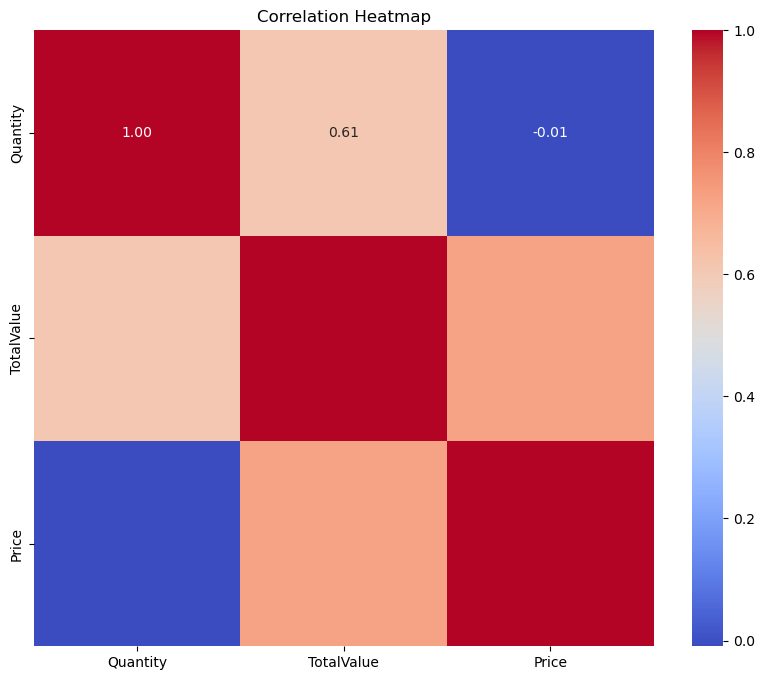

In [46]:
# Correlation Heatmap for Numerical Features
if not numerical_columns.empty:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("\nNo numerical columns available for correlation analysis.")

### EDA on Products Dataset

In [47]:
pro_df = pd.read_csv(r"Downloads/Products.csv")

In [48]:
# Datatype od dataset
pro_df.dtypes

ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

In [49]:
# Description of dataset
pro_df.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [50]:
# Information of dataset
pro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TransactionID     1000 non-null   object        
 1   CustomerID        1000 non-null   object        
 2   ProductID         1000 non-null   object        
 3   TransactionDate   1000 non-null   datetime64[ns]
 4   Quantity          1000 non-null   int64         
 5   TotalValue        1000 non-null   float64       
 6   Price             1000 non-null   float64       
 7   TransactionMonth  1000 non-null   int32         
 8   TransactionYear   1000 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(3)
memory usage: 62.6+ KB


In [51]:
# Shape of dataset
pro_df.shape

(1000, 9)

In [52]:
# Missing values in dataset
pro_df.isnull().sum()

TransactionID       0
CustomerID          0
ProductID           0
TransactionDate     0
Quantity            0
TotalValue          0
Price               0
TransactionMonth    0
TransactionYear     0
dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


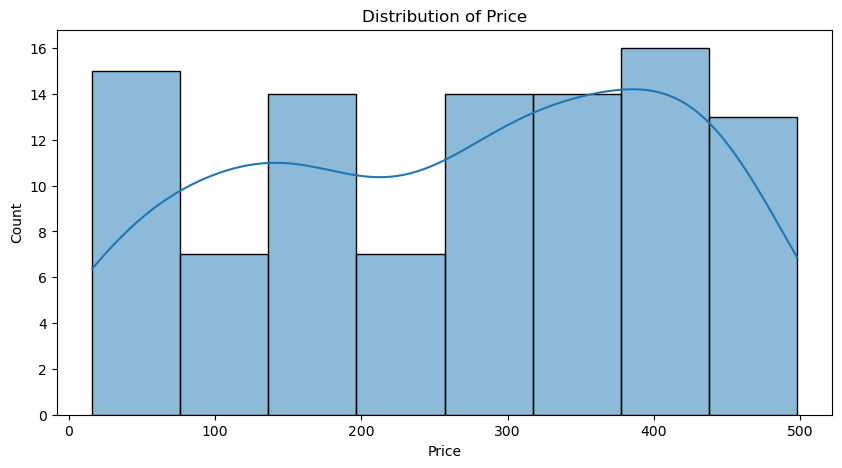

In [56]:
# Explore Numerical Variables
numerical_cols = pro_df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(pro_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


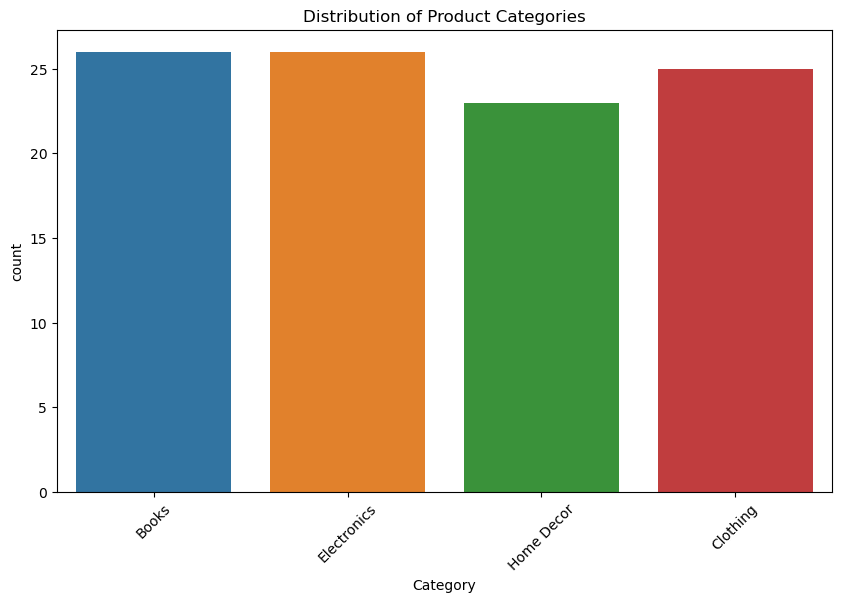

In [58]:
# Analyze Product Categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=pro_df)
plt.title('Distribution of Product Categories')
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


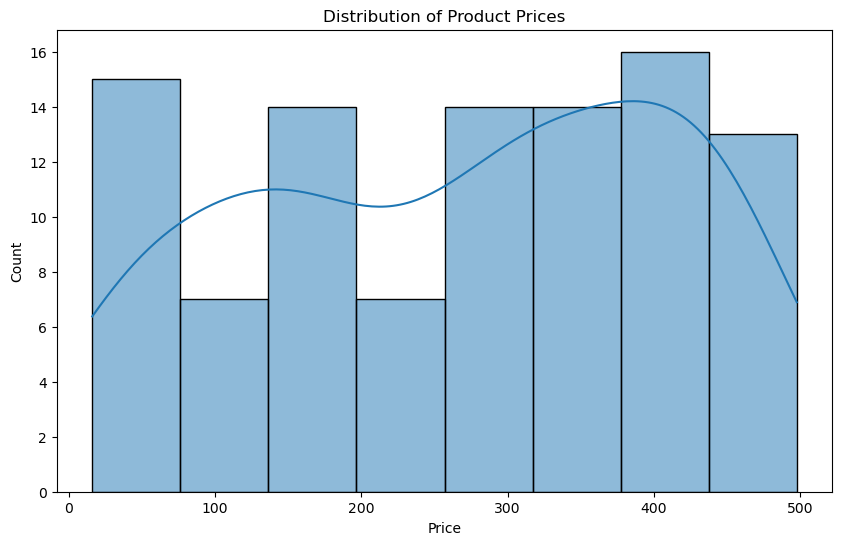

In [60]:
# Analyze Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(pro_df['Price'], kde=True)
plt.title('Distribution of Product Prices')
plt.show()